In [1]:
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
import plotly.express as px
from sklearn.metrics import matthews_corrcoef,confusion_matrix,make_scorer
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/FE_1.csv')

In [3]:
df

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F10,L0_S0_F22,L0_S1_F28,L3_S29_F3333,L3_S29_F3339,...,S48_duration_next_diff,S7_duration_prev_diff,S7_duration_next_diff,S20_duration_prev_diff,S20_duration_next_diff,S24_duration_prev_diff,S24_duration_next_diff,S3_duration_prev_diff,S3_duration_next_diff,Response
0,4,0.030,-0.034,-0.197,-0.179,0.116,-0.273,0.167,0.044,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006,-0.064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.025,0.250,-0.079,0.006,0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.161,-0.253,-0.007,0.038,0.014,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.025,0.042,-0.046,-0.163,0.053,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,-0.023,0.033,-0.015,-0.016,0.070,0.159,-0.056,0.013,-0.116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,-0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1183744,2367492,0.075,0.123,-0.343,-0.325,0.161,0.046,-0.103,0.025,-0.064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1183745,2367493,-0.062,-0.019,-0.179,-0.179,0.116,0.156,-0.045,-0.056,0.131,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0


In [4]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df['Response'].value_counts()[0]/len(df))*100))
print('類1樣本數量比率為:{} %'.format((df['Response'].value_counts()[1]/len(df))*100))

類0樣本數量:1176868
類1樣本數量:6879
類0樣本數量比率為:99.41887920307295 %
類1樣本數量比率為:0.581120796927046 %


In [5]:
X = df.drop(['Id','Response'],axis=1)
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.26967844258141294


<AxesSubplot:>

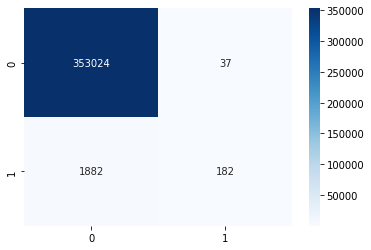

In [6]:
# fit model
model = XGBClassifier(n_estimators=150,subsample=1,max_depth=3,learning_rate=0.1,min_child_weight=5,
                        colsample_bytree=0.7,scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model.fit(X_train, y_train)

# predict data
y_pred = model.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

In [7]:
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=False)

In [8]:
data

,gain
L3_S33_F3855,201.267410
S32_duration_next_diff,197.500641
L3_S34_F3880,128.409988
L3_duration_next_diff,117.680756
L3_S33_F3859,107.637184
...,...
L0_S1_F28,7.225967
S12_max,6.003291
S7_max,5.150658
S3_mean,5.028337


In [79]:
data[0:10]

,gain
L3_S33_F3855,201.267410
S32_duration_next_diff,197.500641
L3_S34_F3880,128.409988
L3_duration_next_diff,117.680756
L3_S33_F3859,107.637184
L3_S33_F3865,100.012543
L0_duration_next_diff,90.585083
S32_max,90.258514
L1_duration_next_diff,84.126122
S32_first,82.785278


In [80]:
data[10:20]

,gain
S32_last,82.068268
L3_S33_F3857,80.711731
S34_max,79.771454
S24_duration_next_diff,75.087303
S33_first,71.031578
S24_duration,70.028252
S12_duration_next_diff,67.531967
S14_duration_next_diff,67.310684
S34_first,66.573730
L1_first,65.827492


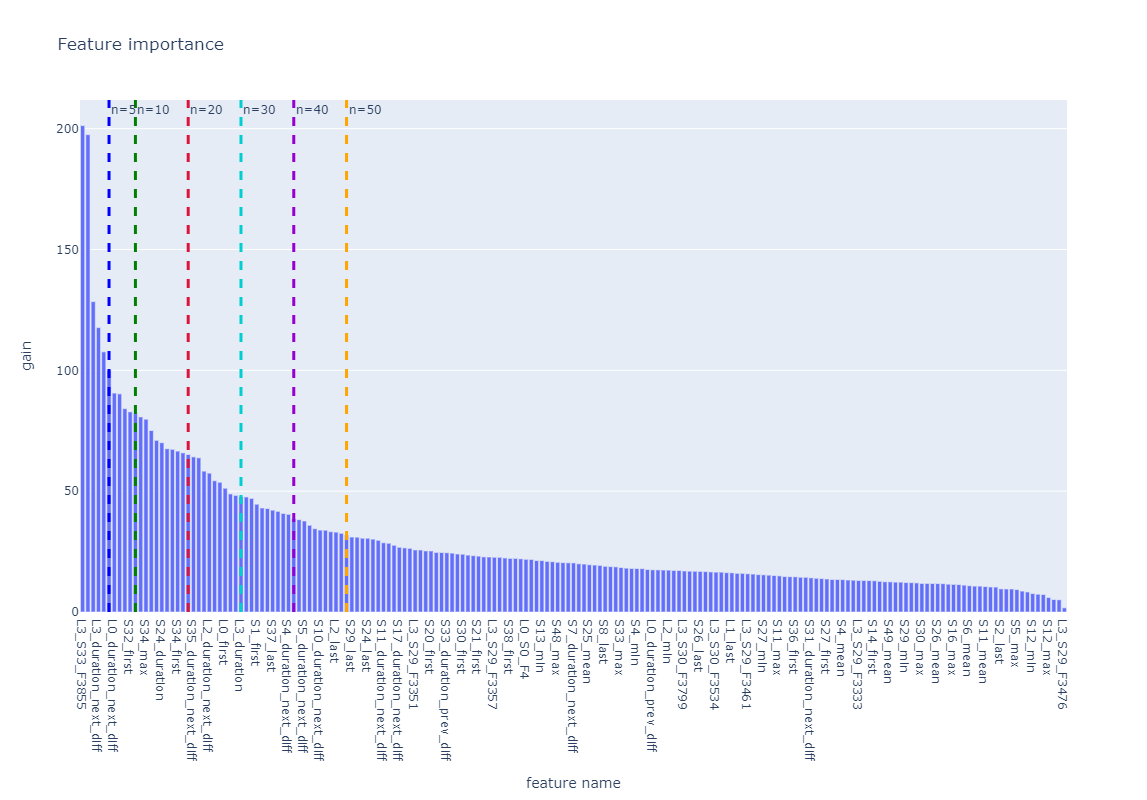

In [62]:
fig = px.bar(data, y="gain",x=data.index,orientation='v' ,title="Feature importance",labels={"index": "feature name"},width=1000,height=800)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="blue",annotation_text="n=5")
fig.add_vline(x=10, line_width=3, line_dash="dash", line_color="green",annotation_text="n=10")
fig.add_vline(x=20, line_width=3, line_dash="dash", line_color="crimson",annotation_text="n=20")
fig.add_vline(x=30, line_width=3, line_dash="dash", line_color="darkturquoise",annotation_text="n=30")
fig.add_vline(x=40, line_width=3, line_dash="dash", line_color="darkviolet",annotation_text="n=40")
fig.add_vline(x=50, line_width=3, line_dash="dash", line_color="orange",annotation_text="n=50")

fig.show()

In [10]:
data_n_5 = data.iloc[:5,]
data_n_10 = data.iloc[:10,]
data_n_20 = data.iloc[:20,]
data_n_30 = data.iloc[:30,]
data_n_40 = data.iloc[:40,]
data_n_50 = data.iloc[:50,]

In [11]:
data_n_5_name = data_n_5.index.values.tolist()
data_n_10_name = data_n_10.index.values.tolist()
data_n_20_name = data_n_20.index.values.tolist()
data_n_30_name = data_n_30.index.values.tolist()
data_n_40_name = data_n_40.index.values.tolist()
data_n_50_name = data_n_50.index.values.tolist()

## model  : n = 5

In [24]:
X = df[df.columns[df.columns.isin(data_n_5_name)]]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.24140482977539368


<AxesSubplot:>

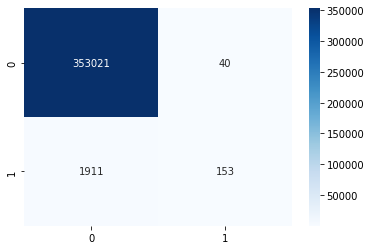

In [26]:
# fit model
model_n5 = XGBClassifier(n_estimators=150,subsample=1,max_depth=3,learning_rate=0.1,min_child_weight=5,
                        colsample_bytree=0.7,scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n5.fit(X_train, y_train)

# predict data
y_pred = model_n5.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

## model  : n = 10

In [ ]:
#define total sample size desired
N = 100000
#perform stratified random sampling
df2=df.groupby('Response', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [ ]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df2['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df2['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df2['Response'].value_counts()[0]/len(df2))*100))
print('類1樣本數量比率為:{} %'.format((df2['Response'].value_counts()[1]/len(df2))*100))

In [22]:
X = df2[df2.columns[df2.columns.isin(data_n_10_name)]]
y = df2['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
params = { 'n_estimators': [50,100,150],
           'max_depth': [3,5,7,9],
           'learning_rate': [0.01, 0.05, 0.1],
           'min_child_weight':[0,5,15],
          'scale_pos_weight':[1,10,100]
         }

xgb_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)

grid_search = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring=make_scorer(matthews_corrcoef), 
                   n_jobs=-1,
                   verbose=3,
                    cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

In [ ]:
X = df[df.columns[df.columns.isin(data_n10_name)]]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.2579775341605456


<AxesSubplot:>

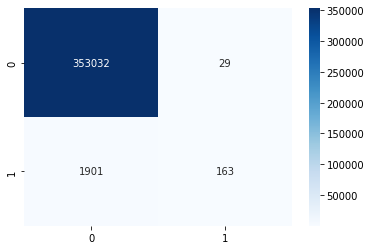

In [23]:
# fit model
model_n10 = XGBClassifier(n_estimators=150,subsample=1,max_depth=3,learning_rate=0.1,min_child_weight=5,
                        colsample_bytree=0.7,scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n10.fit(X_train, y_train)

# predict data
y_pred = model_n10.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

## model  : n = 20

In [ ]:
#define total sample size desired
N = 100000
#perform stratified random sampling
df2=df.groupby('Response', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [ ]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df2['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df2['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df2['Response'].value_counts()[0]/len(df2))*100))
print('類1樣本數量比率為:{} %'.format((df2['Response'].value_counts()[1]/len(df2))*100))

In [20]:
X = df2[df2.columns[df2.columns.isin(data_n_20_name)]]
y = df2['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
params = { 'n_estimators': [50,100,150],
           'max_depth': [3,5,7,9],
           'learning_rate': [0.01, 0.05, 0.1],
           'min_child_weight':[0,5,15],
          'scale_pos_weight':[1,10,100]
         }

xgb_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)

grid_search = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring=make_scorer(matthews_corrcoef), 
                   n_jobs=-1,
                   verbose=3,
                    cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

In [ ]:
X = df[df.columns[df.columns.isin(data_n_20_name)]]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.25040671001045284


<AxesSubplot:>

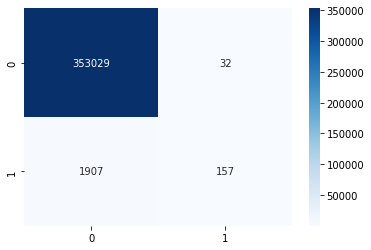

In [21]:
# fit model
model_n20 = XGBClassifier(n_estimators=150,subsample=1,max_depth=3,learning_rate=0.1,min_child_weight=5,
                        colsample_bytree=0.7,scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n20.fit(X_train, y_train)

# predict data
y_pred = model_n20.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

## model  : n = 30

In [ ]:
#define total sample size desired
N = 100000
#perform stratified random sampling
df2=df.groupby('Response', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [ ]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df2['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df2['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df2['Response'].value_counts()[0]/len(df2))*100))
print('類1樣本數量比率為:{} %'.format((df2['Response'].value_counts()[1]/len(df2))*100))

In [17]:
X = df2[df2.columns[df2.columns.isin(data_n_30_name)]]
y = df2['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
params = { 'n_estimators': [50,100,150],
           'max_depth': [3,5,7,9],
           'learning_rate': [0.01, 0.05, 0.1],
           'min_child_weight':[0,5,15],
          'scale_pos_weight':[1,10,100]
         }

xgb_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)

grid_search = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring=make_scorer(matthews_corrcoef), 
                   n_jobs=-1,
                   verbose=3,
                    cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

In [ ]:
X = df[df.columns[df.columns.isin(data_n_30_name)]]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.2560851564224784


<AxesSubplot:>

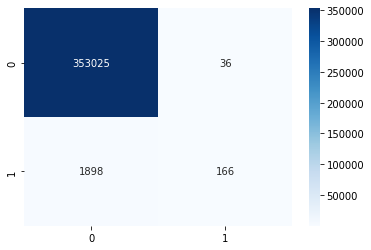

In [18]:
# fit model
model_n30 = XGBClassifier(n_estimators=150,subsample=1,max_depth=3,learning_rate=0.1,min_child_weight=5,
                        colsample_bytree=0.7,scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n30.fit(X_train, y_train)

# predict data
y_pred = model_n30.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

## model  : n = 40

In [85]:
#define total sample size desired
N = 100000
#perform stratified random sampling
df2=df.groupby('Response', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [86]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df2['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df2['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df2['Response'].value_counts()[0]/len(df2))*100))
print('類1樣本數量比率為:{} %'.format((df2['Response'].value_counts()[1]/len(df2))*100))

類0樣本數量:99419
類1樣本數量:581
類0樣本數量比率為:99.419 %
類1樣本數量比率為:0.581 %


In [87]:
X = df2[df2.columns[df2.columns.isin(data_n_40_name)]]
y = df2['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [88]:
params = { 'n_estimators': [50,100,150],
           'subsample' :[0.5,0.7,1],
           'max_depth': [3,5,7,9],
           'learning_rate': [0.01, 0.05, 0.1],
           'min_child_weight':[0,5,15],
           'colsample_bytree': [0.5,0.7,1],
          'scale_pos_weight':[1,10,100]
         }

xgb_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)

grid_search = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring=make_scorer(matthews_corrcoef), 
                   n_jobs=-1,
                   verbose=3,
                    cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


KeyboardInterrupt: 

Fitting 3 folds for each of 324 candidates, totalling 972 fits  
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 1}

In [57]:
X = df[df.columns[df.columns.isin(data_n_40_name)]]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.24749605015756956


<AxesSubplot:>

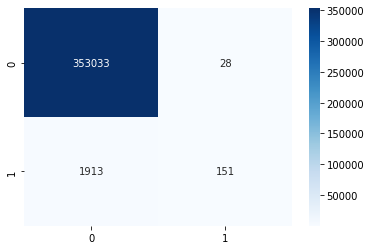

In [58]:
# fit model
model_n40 = XGBClassifier(n_estimators=150,max_depth=3,learning_rate=0.05,min_child_weight=5,
                        scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n40.fit(X_train, y_train)

# predict data
y_pred = model_n40.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

## model  : n = 50

In [81]:
#define total sample size desired
N = 100000
#perform stratified random sampling
df2=df.groupby('Response', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [82]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df2['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df2['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df2['Response'].value_counts()[0]/len(df2))*100))
print('類1樣本數量比率為:{} %'.format((df2['Response'].value_counts()[1]/len(df2))*100))

類0樣本數量:99419
類1樣本數量:581
類0樣本數量比率為:99.419 %
類1樣本數量比率為:0.581 %


In [83]:
X = df2[df2.columns[df2.columns.isin(data_n_50_name)]]
y = df2['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [84]:
params = {'n_estimators': [50,100,150],
           'subsample' :[0.5,0.7,1],
           'max_depth': [3,5,7,9],
           'learning_rate': [0.01, 0.05, 0.1],
           'min_child_weight':[0,5,15],
           'colsample_bytree': [0.5,0.7,1],
          'scale_pos_weight':[1,10,100]
         }

xgb_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)

grid_search = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring=make_scorer(matthews_corrcoef), 
                   n_jobs=-1,
                   verbose=3,
                    cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 1}


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 1}

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits  
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 50, 'scale_pos_weight': 10, 'subsample': 1}

In [89]:
X = df[df.columns[df.columns.isin(data_n_50_name)]]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.22944953719759287


<AxesSubplot:>

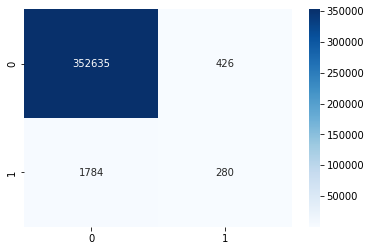

In [91]:
# fit model
model_n50 = XGBClassifier(n_estimators=50,max_depth=3,learning_rate=0.05,min_child_weight=0,colsample_bytree=0.5,subsample=1,
                        scale_pos_weight=10,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n50.fit(X_train, y_train)

# predict data
y_pred = model_n50.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

Our MCC is:  0.2838689774690604


<AxesSubplot:>

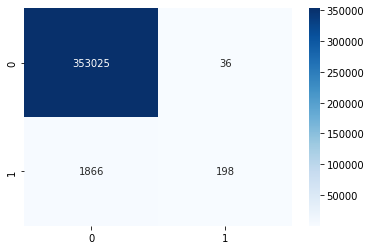

In [64]:
# fit model
model_n50 = XGBClassifier(n_estimators=150,subsample=0.7,max_depth=7,learning_rate=0.1,min_child_weight=5,colsample_bytree=1, 
                        scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model_n50.fit(X_train, y_train)

# predict data
y_pred = model_n50.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')